In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
df.shape

(908, 13)

In [6]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [7]:
df.index

RangeIndex(start=0, stop=908, step=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [10]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [11]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [12]:
df["oldpeak"]=df["oldpeak"].fillna(df["oldpeak"]).median()

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [14]:
category=["sex","cp","restecg","exang","slope","thal"]

for cat in category:
    df[cat]=df[cat].astype("category")


In [15]:
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs             bool
restecg     category
thalch         int64
exang       category
oldpeak      float64
slope       category
thal        category
num            int64
dtype: object

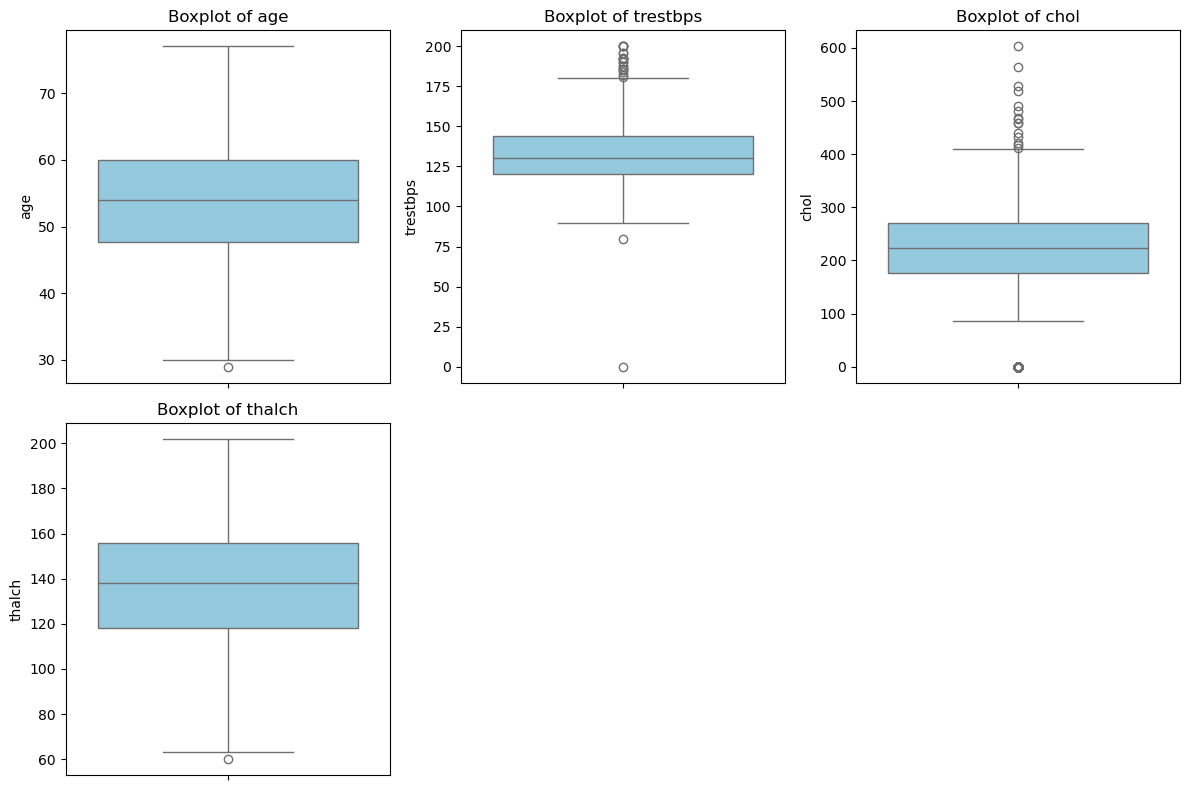

In [16]:
#Outlier detection

numeric_cols = ['age', 'trestbps', 'chol', 'thalch']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

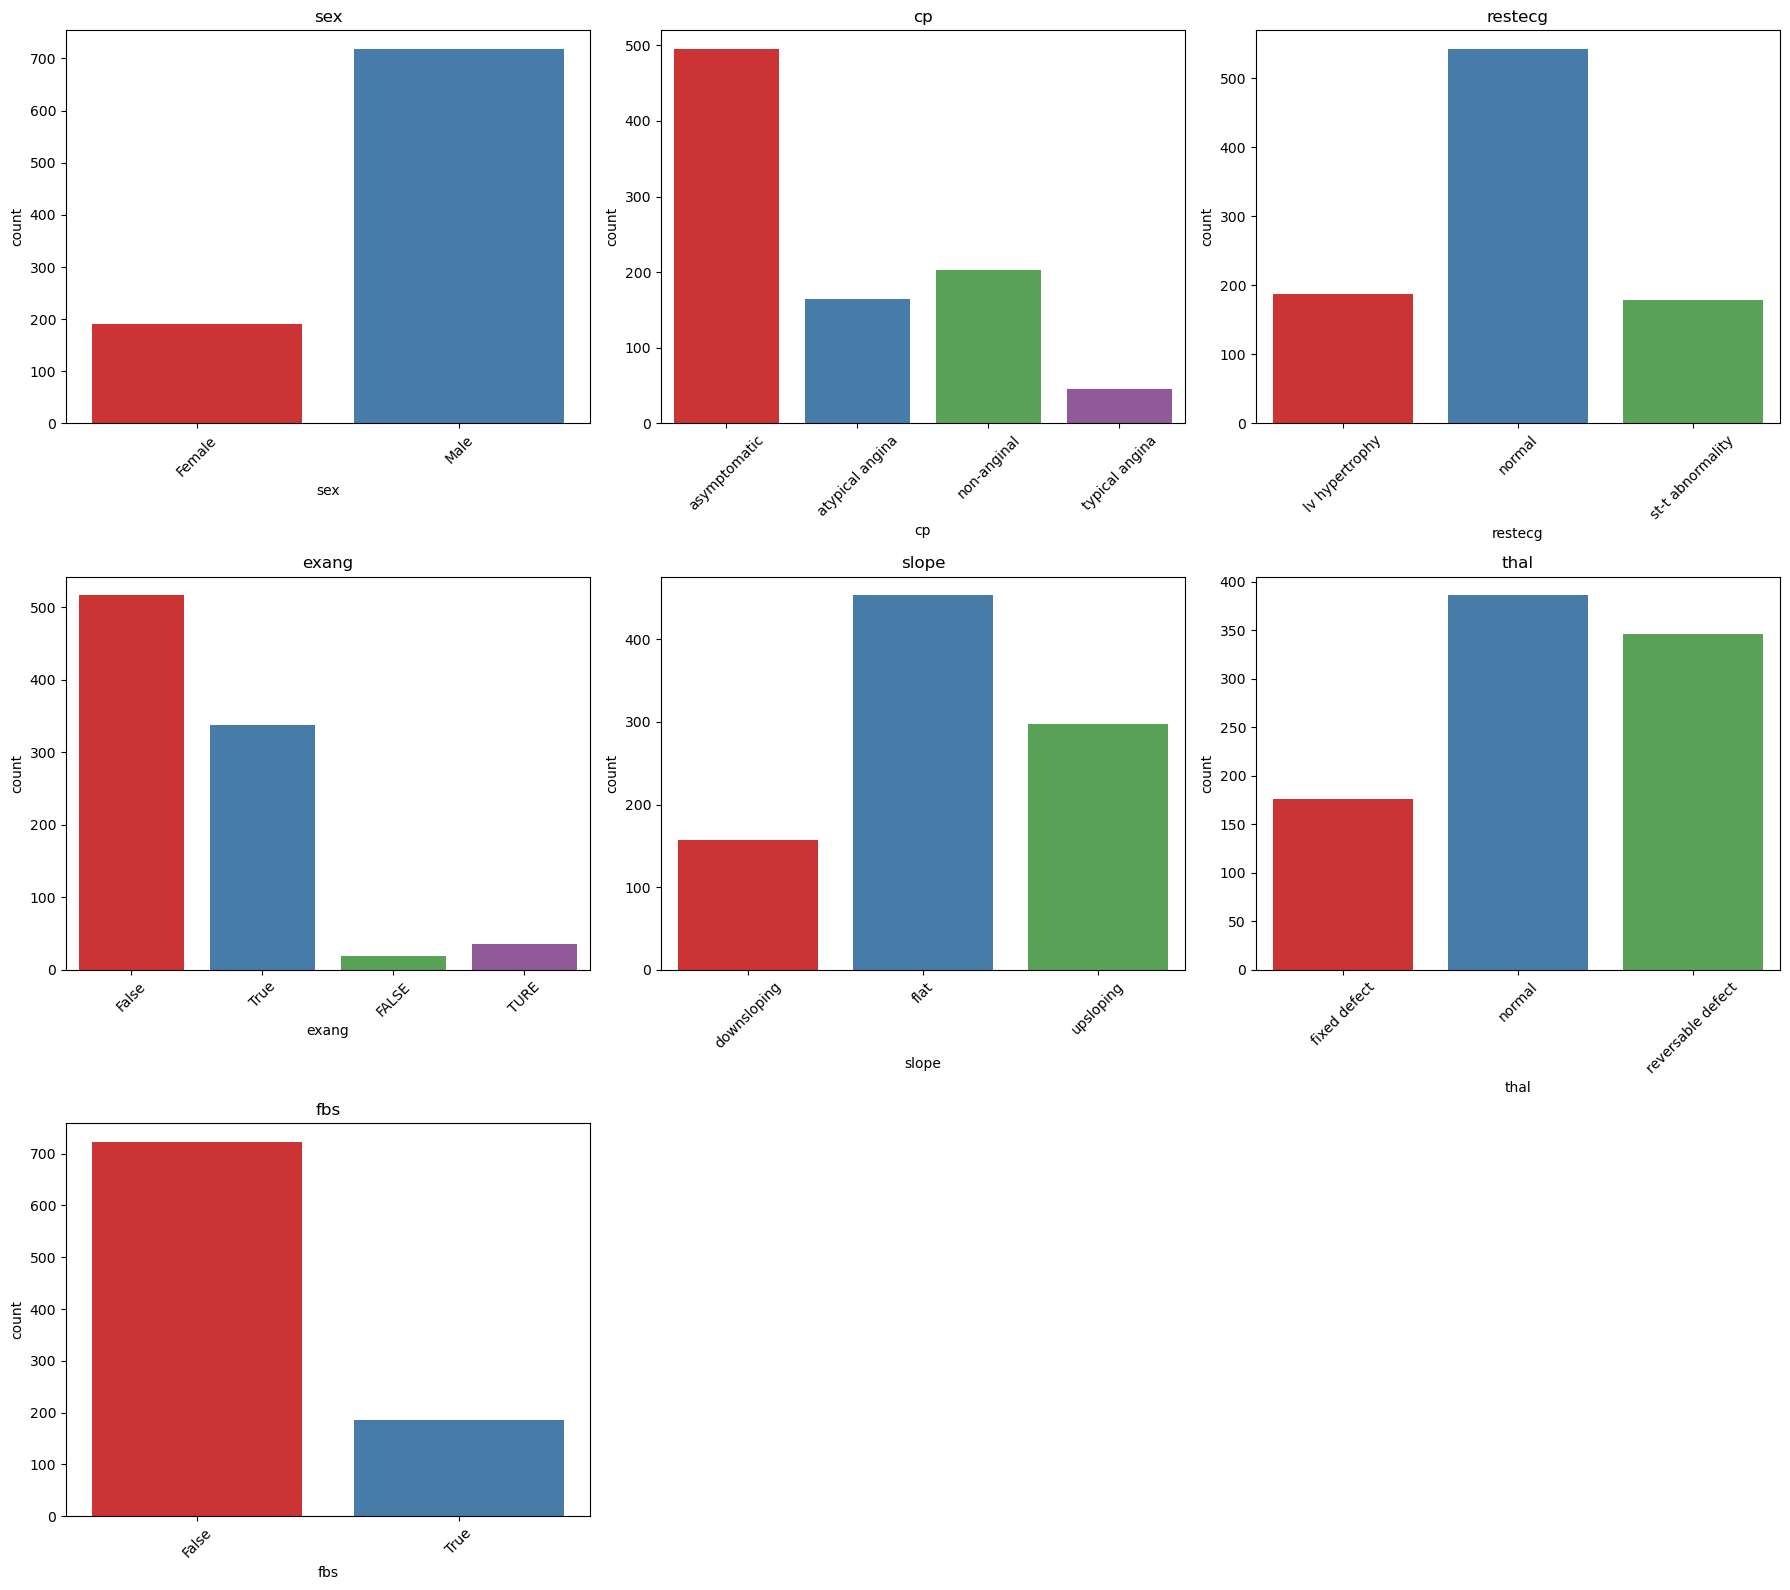

In [17]:
plt.figure(figsize=(18, 16))

category_cols = ["sex","cp","restecg","exang","slope","thal","fbs"]

for i, col in enumerate(category_cols, 1):
    plt.subplot(3, 3, i)   
    sns.countplot(x=df[col], palette="Set1")
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
category_cols = ["sex","cp","restecg","exang","slope","thal","fbs","oldpeak"]

for col in category_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in sex:
['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Unique values in cp:
['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal']
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina']

Unique values in restecg:
['lv hypertrophy', 'normal', 'st-t abnormality']
Categories (3, object): ['lv hypertrophy', 'normal', 'st-t abnormality']

Unique values in exang:
[False, True, 'FALSE', 'TURE']
Categories (4, object): [False, True, 'FALSE', 'TURE']

Unique values in slope:
['downsloping', 'flat', 'upsloping']
Categories (3, object): ['downsloping', 'flat', 'upsloping']

Unique values in thal:
['fixed defect', 'normal', 'reversable defect']
Categories (3, object): ['fixed defect', 'normal', 'reversable defect']

Unique values in fbs:
[ True False]

Unique values in oldpeak:
[0.5]


In [19]:
df=df.drop("oldpeak",axis=1) # not useful

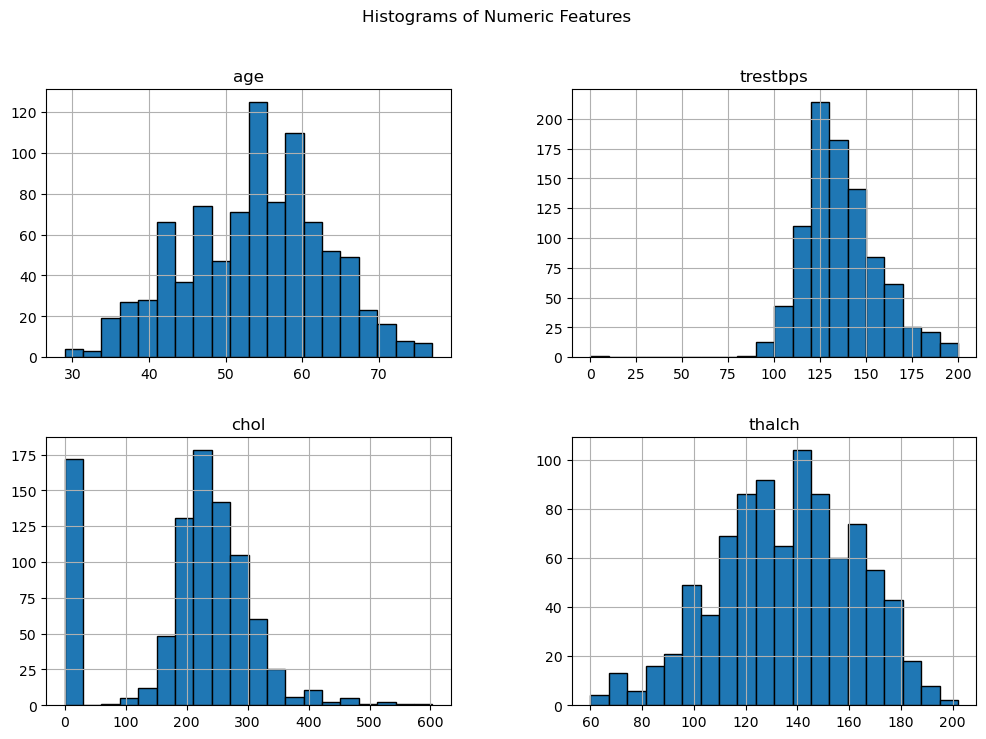

In [20]:
df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()

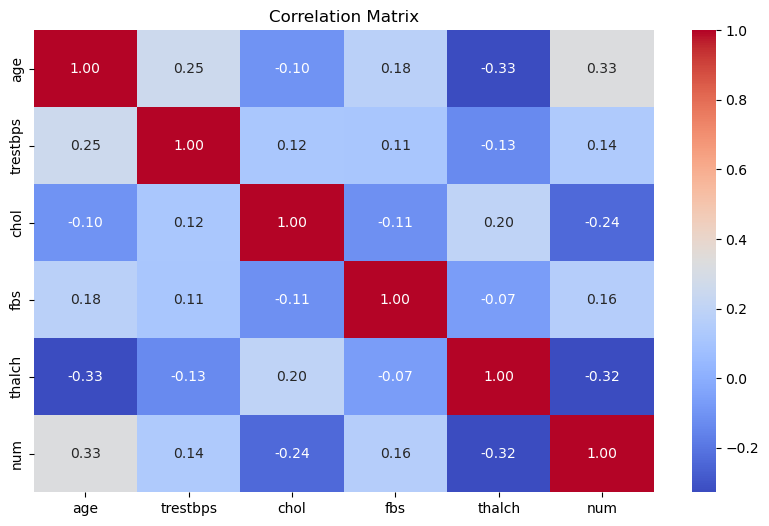

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [22]:
df['fbs'] = df['fbs'].astype(int) 

In [23]:
for col in ["sex","cp","restecg","exang","slope","thal"]:
    print(f"\nColumn: {col}")
    print(df[col].unique())
    print(df[col].map(type).unique())


Column: sex
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[<class 'str'>]

Column: cp
['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal']
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina']
[<class 'str'>]

Column: restecg
['lv hypertrophy', 'normal', 'st-t abnormality']
Categories (3, object): ['lv hypertrophy', 'normal', 'st-t abnormality']
[<class 'str'>]

Column: exang
[False, True, 'FALSE', 'TURE']
Categories (4, object): [False, True, 'FALSE', 'TURE']
[<class 'bool'> <class 'str'>]

Column: slope
['downsloping', 'flat', 'upsloping']
Categories (3, object): ['downsloping', 'flat', 'upsloping']
[<class 'str'>]

Column: thal
['fixed defect', 'normal', 'reversable defect']
Categories (3, object): ['fixed defect', 'normal', 'reversable defect']
[<class 'str'>]


In [24]:
#Label Encoding 

df_encoded = df.copy()

cat_cols = ["sex","cp","restecg","exang","slope","thal"]

for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype(str)   # force string

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded.dtypes)
print(df_encoded.head())


age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalch      int64
exang       int64
slope       int64
thal        int64
num         int64
dtype: object
   age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  slope  thal  num
0   63    1   3       145   233    1        0     150      1      0     0    0
1   41    1   1       135   203    0        1     132      1      1     0    0
2   57    1   0       140   192    0        1     148      1      1     0    0
3   52    1   3       118   186    0        0     190      1      1     0    0
4   57    1   0       110   201    0        1     126      3      1     0    0


In [25]:
#StandardScaling 

from sklearn.preprocessing import StandardScaler

# Numeric columns to scale
num_cols = ['age', 'trestbps', 'chol', 'thalch']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print(df_encoded.head())

        age  sex  cp  trestbps      chol  fbs  restecg    thalch  exang  \
0  1.006027    1   3  0.567394  0.281297    1        0  0.524183      1   
1 -1.397560    1   1  0.076967  0.013526    0        1 -0.147705      1   
2  0.350503    1   0  0.322181 -0.084656    0        1  0.449529      1   
3 -0.195767    1   3 -0.756760 -0.138211    0        0  2.017268      1   
4  0.350503    1   0 -1.149102 -0.004325    0        1 -0.371668      3   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0  


In [34]:
#Train-Test-split

from sklearn.model_selection import train_test_split

x = df_encoded.drop("num", axis=1)   
y = df_encoded["num"]  

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)

Training set size: (726, 11)
Testing set size: (182, 11)


In [37]:
#Model 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Train the Decision Tree
df.fit(x_train, y_train)

# Predictions
y_pred = df.predict(x_test)

# Evaluation Metrics
print("Model Evaluation Results")
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC for multiclass
y_pred_proba = df.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("\nROC-AUC Score (OvR):", roc_auc)


Model Evaluation Results
Accuracy: 0.5274725274725275

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70        89
           1       0.42      0.42      0.42        48
           2       0.38      0.45      0.42        22
           3       0.24      0.24      0.24        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.35      0.36      0.35       182
weighted avg       0.53      0.53      0.53       182


Confusion Matrix:
 [[62 13  6  6  2]
 [18 20  7  1  2]
 [ 2  5 10  5  0]
 [ 5  6  2  4  0]
 [ 0  4  1  1  0]]

ROC-AUC Score (OvR): 0.6123847872645503


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the base model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid,
                           cv=5,              # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

# Fit GridSearch
grid_search.fit(x_train, y_train)

# Print best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model
best_dt = grid_search.best_estimator_

# Evaluate on test data
y_pred_best = best_dt.predict(x_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Score: 0.546887104393009

Test Accuracy: 0.5604395604395604

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75        89
           1       0.40      0.46      0.43        48
           2       0.32      0.36      0.34        22
           3       0.38      0.18      0.24        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.37      0.35      0.35       182
weighted avg       0.54      0.56      0.54       182


Confusion Matrix:
 [[69 12  6  2  0]
 [20 22  5  1  0]
 [ 3 10  8  1  0]
 [ 2  7  5  3  0]
 [ 0  4  1  1  0]]


Tuned Decision Tree Evaluation
Accuracy: 0.5604395604395604

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75        89
           1       0.40      0.46      0.43        48
           2       0.32      0.36      0.34        22
           3       0.38      0.18      0.24        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.37      0.35      0.35       182
weighted avg       0.54      0.56      0.54       182


Confusion Matrix:
 [[69 12  6  2  0]
 [20 22  5  1  0]
 [ 3 10  8  1  0]
 [ 2  7  5  3  0]
 [ 0  4  1  1  0]]

ROC-AUC Score (OvR): 0.695613371634688


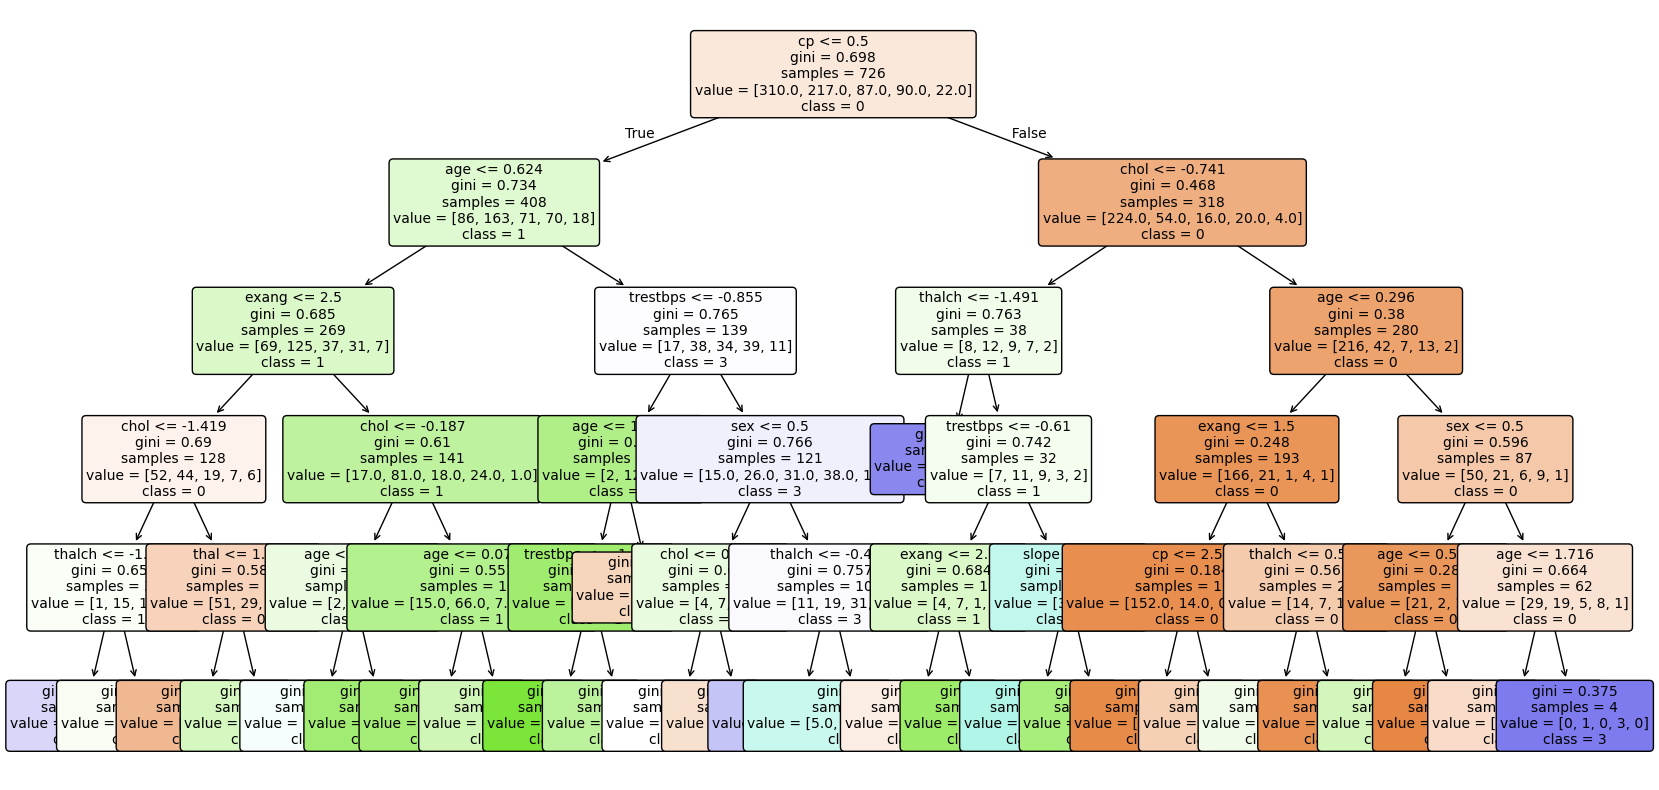

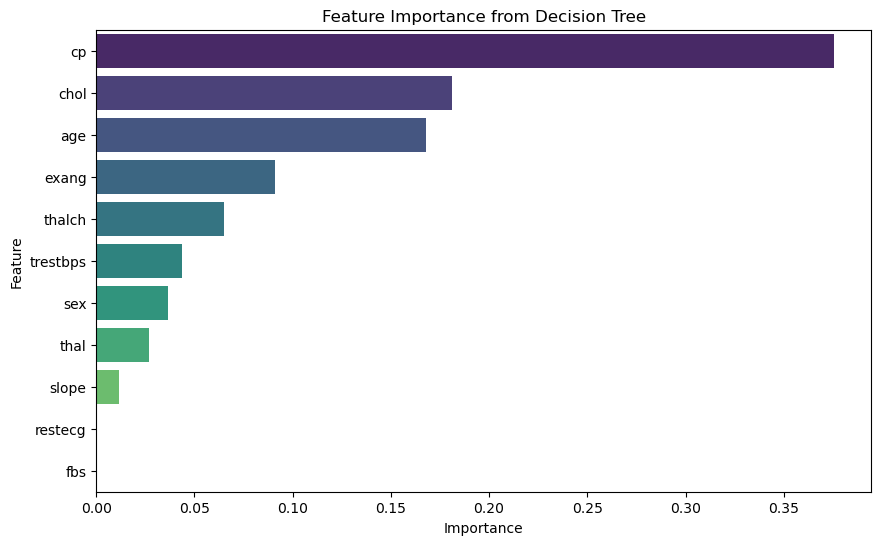

In [39]:
# 1. Model Evaluation
print("Tuned Decision Tree Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# ROC-AUC for multiclass (using probabilities)
y_pred_best_proba = best_dt.predict_proba(x_test)
roc_auc_best = roc_auc_score(y_test, y_pred_best_proba, multi_class='ovr')
print("\nROC-AUC Score (OvR):", roc_auc_best)

# 2. Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt, 
               feature_names=x.columns, 
               class_names=[str(c) for c in y.unique()], 
               filled=True, 
               rounded=True, 
               fontsize=10)
plt.show()

# 3. Feature Importance
importances = best_dt.feature_importances_
feat_imp = pd.DataFrame({"Feature": x.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance from Decision Tree")
plt.show()


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
   
Some common hyperparameters in Decision Trees and their effects are:
max_depth – Maximum depth of the tree.
Controls how many levels (splits) the tree can grow.
Higher depth → more complex, risk of overfitting.
Lower depth → simpler, may underfit.
min_samples_split – Minimum number of samples required to split an internal node.
Larger values → tree splits only when more data is available, making it more generalized.
Smaller values → more splits, may lead to overfitting.
min_samples_leaf – Minimum number of samples in a leaf node.
Ensures leaves have enough samples.
Larger value → smoother predictions, avoids tiny leaves.
max_features – Number of features considered when splitting a node.
If small → reduces variance, introduces randomness (useful in Random Forests).
If all → deterministic splits, but may overfit.
criterion – Function to measure quality of a split (e.g., gini, entropy).
Changes how the tree decides the "best split".
Often performance difference is small, but entropy is more computationally expensive.
max_leaf_nodes – Maximum number of leaf nodes.
Limits the tree’s complexity, prevents overfitting.

In short: Hyperparameters are trade-offs between bias and variance.
Too loose → underfit, too strict → overfit.

3. What is the difference between the Label encoding and One-hot encoding?

Label Encoding:
Converts categories into integers.
Example: ["Red", "Green", "Blue"] → [0, 1, 2].
Simple, but introduces an ordinal relationship (model may think 2 > 1 > 0), which can mislead algorithms.
Works best with tree-based models (Decision Trees, Random Forest, XGBoost) since they don’t assume ordering.

One-Hot Encoding:
Creates binary columns for each category.
Example: ["Red", "Green", "Blue"] → [1,0,0], [0,1,0], [0,0,1].
Removes artificial order but increases dimensionality (curse of dimensionality).
Works best with linear models, distance-based models (KNN, SVM), neural networks.

Key difference:
Label encoding is compact but may mislead due to ordering.
One-hot encoding avoids ordering issues but increases feature space.